# Support Vector Machines(SVM) 
## Part 0 Introduction
The SVM is a binary classification model. For the two sets of vectors that are marked, an optimal segmentation hypersurface is given to divide the two sets of vectors into two sides, so that the vector in the two sets of vectors that is closest to the hyperplane (that is, The so-called support vectors) are as far away as possible from this hyperplane.<br /> <br /> 
SVM model types can be roughly divided into the following three types： <br /> 
（1）Linearly separable support vector machine: When the data is linearly separable, a linear classifier is learned through the hard margin maximum method, which can also be called a hard margin support vector machine.<br /> 
（2）Linear support vector machine, when the data is approximately linearly separable, learn a linear classifier through the soft margin maximum method, which can also be called soft margin support vector machine. <br /> 
（3）Nonlinear SVM: Learning a nonlinear classifier by kernel trick and soft margin maximization when the data is linearly inseparable.<br /> 
Next, we briefly introduce these three method.
## Part 1 Principle introduction
### 0.Function Margin & Geometric Margin
#### a) Function Margin
For a given dataset D and hyperplane (w, b), define the function margin of hyperplane (w, b) with respect to sample points (x<sub>i</sub>,y<sub>i</sub>) as
<center>$\widehat{\gamma}$<sub>i</sub> = y<sub>i</sub>&nbsp;(w$\cdot$x<sub>i</sub>+b)</center>


#### b) Geometric Margin
The geometric margin of the hyperplane (w,b) with respect to the sample points (x<sub>i</sub>, y<sub>i</sub>) is generally the signed distance from the instance point to the hyperplane. When the sample point is correctly classified by the hyperplane, it is the distance from the instance point to the hyperplane. Expressed as:
<center>$\gamma$<sub>i</sub> = y<sub>i</sub>&nbsp;($\frac{w}{||w||}$$\cdot$x<sub>i</sub>+$\frac{b}{||w||}$)</center>


#### c) The relationship between function margin and geometric margin
<center>$\gamma$<sub>i</sub> = $\frac{\widehat{\gamma}_i}{||w||}$</center>
If $||w||=1$, then the function margin is equal to the geometric margin.

### 1.Hard-Margin Support Vector Machines
Support vector machine belongs to supervised learning, and its training data appears in pairs, so given a training set D={(x<sub>1</sub>, y<sub>1</sub>), (x<sub >2</sub>, y<sub>2</sub>), ...(x<sub>m</sub>,y<sub>m</sub>)}, y<sub>i< /sub>=(+1, -1) must appear in pairs. The learning goal of the linear separable SVM is to find a separating hyperplane in the sample space based on the training data set D, so as to maximize the <font color='red'>geometric margin</font>, and to assign instances to different In the class, the equation $w*x+b=0$ corresponding to the separation hyperplane, which is determined by the normal vector w and the intercept b.
   
<center>$w=(w1,w2,...)$  is the normal vector, which determines the direction of the hyperplane <br />
$b$  is the displacement amount, which determines the distance between the hyperplane and the origin <br /></center>
The second goal is to find the corresponding decision function, and to divide the unknown data through the hyperplane:<br />
$$f(x)=sign(wx+b)$$
According to the theoretical proof, the hyperplane that maximizes the geometric margin is unique, and the intuitive explanation for maximizing the margin is: finding the hyperplane with the largest geometric margin for the training data set means classifying the training data with a sufficiently large degree of certainty. The geometric margin of the plane about each sample point should be greater than $\gamma$. The constrained optimization problem of the maximal margin separating hyperplane is given below:<br />
<center>$\underset {w,b}{max}$&nbsp;&nbsp;$\gamma$<br /><br />
$s.t. \frac{y_i~(wx_i+b)}{||w||}$ $\geq$ $\widehat{\gamma}_i$
</center>
According to the relationship between geometric margin and function margin, the above formula can be rewritten as:<br />
<center>$\underset {w,b}{max}$&nbsp;&nbsp;$\frac{\widehat{\gamma}}{||w||}$<br /><br />
$s.t. y_i$($w$$\cdot$$x_i$>$+b$) $\geq$ $\widehat{\gamma}$
</center>
$\widehat{\gamma}$ is the function margin, which is affected by $w$ and $b$, that is, how many times it expands at the same time, how many times the function margin will expand, but divide it by a $||w||$ After that, the multiple of the result is reduced, so no matter how the function margin changes, the geometric margin is not affected, then we can also set the function margin to a fixed value $1$, which can greatly simplify our models and calculations. Then our goal is to maximize $\frac{1}{||w||}$, considering the problem of later calculation, convert it into a more general form, which is equivalent to minimizing $\frac{ 1}{2}$$||w||^2$, so we get the final optimization constraint problem:
<center>$\underset {w,b}{min}$&nbsp;&nbsp;$\frac{1}{2}$$||w||^2$<br /><br />
$s.t. y_i$($w$$\cdot$$x_i$$+b$)-1 $\geq$ 0 
</center>
The maximum margin method is to use the above to solve the constrained optimization problem.


 
### 2.Linear Support Vector Machines and Soft Margin Max
In the above, we mainly discussed the linearly separable support vector machines, but in reality, the data is often linearly inseparable, that is, there are noise points in the data, so that it is not completely linearly separable, or approximately linearly separable. In this case, This situation is called soft margin maximization, that is, the linear support vector machine, and the linearly separable support vector machine can be regarded as a special case of the linear support vector machines. <br /><br />
Assuming a training dataset $T=${$(x_1,y_1),(x_2,y_2),...,(x_N,y_N)$} on a feature space, where $x_i \in X = R ^n $, $y_i = {+1,-1}, i=1,2,...,N$, $x_i$ is the $i$ feature vector, $y_i$ is the class label of $x_i$ . Also assume that the training dataset is not linearly separable. Usually, there are some outliers in the training data. After removing these outliers, the set of most of the remaining sample points is linearly separable.<br /><br /> 
Introduce a slack variable $\xi_i \geq 0$ to each sample point, so that the function plus the slack variable is greater than or equal to $1$, and the constraint becomes<br />
<center>$y_i$($w$$\cdot$$x_i$$+b$) $\geq$ $1 - \xi_i$</center><br />
The objective function becomes:<br />
<center>$\frac{1}{2}$$||w||^2$ + $C\sum_{i=1}^N \xi_i$</center><br />
Among them, $C$ is the penalty parameter, $C>0$, which is generally determined by the practical application problem. When $C$ increases, the penalty for misclassification is greater, and when $C$ decreases, the penalty for misclassification decreases. And how to solve the linear inseparable support vector machines? The learning dual algorithm is used here, that is, the Lagrangian duality algorithm is used to solve it.<br /><br /> 
Construct the Lagrangian function:<br />
<center>
$L(\omega,b,\xi,\alpha,\mu)$ = $\frac{1}{2}$$||w||^2$ + $C\sum_{i=1}^N \xi_i$ + $\sum_{i=1}^N \alpha_i(1-\xi_i-y_i(\omega x_i+b))$ - $\sum_{i=1}^N \mu_i\xi_i$
</center><br />
Where $\alpha_i \geq 0$,$\mu_i \geq 0$. The original problem is the problem of finding the minimum and maximum ($\underset{\alpha}{max}$ $\underset {\omega,b,\xi}{min}$
$L(\omega,b,\xi,\alpha,\mu)$), Then its dual problem is to find the maximum and minimum problems, that is:<br />
<center>
$\underset {\alpha}{min}$&nbsp;$\frac{1}{2}$$\sum_{i=1}^N$$\sum_{j=1}^N$$\alpha_i \alpha_j y_i y_j$($x_i$$\cdot$$x_j$) $-$ $\sum_{i=1}^N \alpha_i$ <br>
$s.t. \sum_{i=1}^N \alpha_i y_i$ $=$ 0, <br>
$0 \leq \alpha_i \leq C , i = 1,2,...,N$ <br>
</center>
The optimal solution can be obtained $\alpha^*=(\alpha_1^*,\alpha_2^*,...,\alpha_N^*)^T$, and then bring $\alpha^*$ into the expression to get Solution for $w$<br />
<center> $w^* = \sum_{i=1}^N \alpha_i^* y_i x_i$ </center><br />
Select a component of $\alpha^*$ $\alpha_j^*$ to satisfy the condition $0<\alpha_j^*<C$, calculate<br />
<center> $b^* = y_i - \sum_{i=1}^N y_i \alpha_i^* (x_i \cdot y_i)$ </center><br />
Finally, the separating hyperplane can be obtained:<br />
<center> $w^* \cdot x + b^* = 0 $ </center><br />
The classification decision function is:<br />
<center> $f(x) = sign (w^* \cdot x + b^* ) $ </center><br />


### 3.Nonlinear Support Vector Machines
For samples that are linearly inseparable in a limited dimensional vector space, we can map them to a higher-dimensional vector space, and then learn the support vector machine through the maximum interval. This is the nonlinear support vector machines, simple The understanding is:<br> 
<center><b>Nonlinear SVM = Kernel Skill + Linear SVM</b>.</center>
The key of nonlinear kernel function is to map the linearly inseparable sample data in the input space to the linearly separable feature space. The quality of the feature space directly affects the effect of SVM, so the choice of kernel function is an extremely important issue. Here are some commonly used kernel functions:
    
#### 1. Linear kernel function<br />
<center>$k(x_i , x_j) = x_i^T x_j$ </center><br />
There is no need to specify parameters when used, it directly calculates the inner product of the two input vectors. For the samples transformed by the linear kernel function, the feature space and the input space coincide, which means that the samples are not mapped to a higher dimensional space.

#### 2. Polynomial Kernel Function
<center>$k(x_i , x_j) =(\gamma x_i^T x_j + r)d，\gamma > 0，d \geq 1$</center><br />
It is necessary to specify three parameters $\gamma, r and d$, which is an unstable kernel, which is suitable for the case where the data is normalized and standardized.<br />

#### 3. RBF kernel function
<center>$k(x_i , x_j) =exp(-\gamma||x_i-x_j||^2)，\gamma > 0$</center><br />
RBF kernel, also known as Gaussian kernel, is a family of kernel functions. It maps samples in the input space to a higher-dimensional space in a non-linear fashion, so it can handle the non-linear relationship between class labels and sample attributes. It has a parameter $\gamma$ This parameter is very critical! If the setting is too large, the entire RBF kernel will degenerate like a linear kernel, and the ability to non-linearly project to higher dimensions will be weakened; if the setting is too small, the influence of noise in the sample will be too large, thus interfering with the final training model. Effect. <br />   

#### 4. Sigmoid kernel function
<center>$k(x_i , x_j) =tanh(\gamma x_i^T x_j + r)$</center><br />
Sigmoid kernel function is derived from neural network and is widely used in machine learning and deep learning. It has two parameters $\gamma and r$, and the parameter settings should be appropriate. <br />




## Part 2 Code Example
> Note: See the file SVM.ipynb for the complete code
### 1.Hard-Margin Support Vector Machines
#### a) Import the library and load the data

In [10]:
import numpy as np
import pylab as pl  # Drawing function
from sklearn import svm  #Import the svm module in the sklearn library

# Here 40 points are randomly generated as a linearly separable training dataset
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
# Samples of classes 0 and 1 20 points per class, Y is a column vector of 40 rows and 1 column
Y = [0] * 20 + [1] * 20

#### b) Create a Support Vector Machines Model

In [11]:
# build svm model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

SVC(kernel='linear')

#### c) Define the decision boundary function
Drawing decision boundary function according to support vector machine SVM.

In [32]:
def svc_decision_boundary(clf,xmin,xmax):
    w = clf.coef_[0] # model weights
    b = clf.intercept_[0] # model offset
    
    # The decision boundary function (division hyperplane equation) satisfies: w0x0 + w1x1 + b = 0, convert it into a point-slope equation
    # => ：x1 = -(w0/w1)x0 - (b/w1)
    xx = np.linspace(xmin,xmax) # xmin starting point, xmax is the end point
    yy = -(w[0] / w[1]) * xx - b / w[1] 
    
    margin = 1 / w[1]  #The maximum spacing of support vectors is twice that
    # Draw and divide two lines parallel to the hyperplane and passing through the support vector (same slope, different intercept)
    yy_down = yy - margin
    yy_up = yy + margin
    
    # get support vectors and print
    svs = clf.support_vectors_
    print("support_vectors_ : ",svs)
    
    # Draw decision boundaries, marginal planes and sample points
    pl.plot(xx, yy, 'k-') 
    pl.plot(xx, yy_down, 'k--')
    pl.plot(xx, yy_up, 'k--')
    
    # Circle the support vectors
    pl.scatter(svs[:, 0], svs[:, 1],s=80, facecolors='#FFAAAA')
    

#### d) Draw decision boundaries

support_vectors_ :  [[-2.35117509  0.99786071]
 [-1.08326947 -1.58018999]
 [ 0.52332693  0.87980558]]


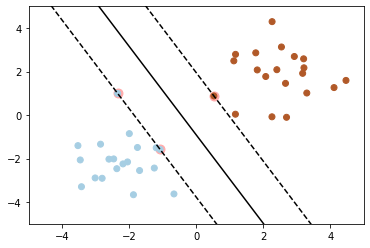

In [33]:
svc_decision_boundary(clf,-5,5)  # call function
pl.scatter(X[:, 0], X[:, 1], c=Y, cmap=pl.cm.Paired) # plot all points
pl.axis([-5, 5, -5, 5])  # coordinate limits
pl.show()

#### f) Experimental summary
The above experiment achieved the classification of the largest interval by building a self-built <font color="red">linearly separable</font> sample set. From the image, it can be clearly seen that the samples are well separated, and the two dotted lines is the maximum interval, focusing on marking points as support vectors. Let's predict a new point (2, 4) and see its class:

In [39]:
print(clf.predict([[2,4]]))

[1]


### 2.Soft margin support vector machines
According to the above principle, if there are some outliers in the linearly separable data, the trained model cannot achieve a better effect. In this case, the function of soft interval is reflected, that is, the parameters in the SVM model Influence on training results, such as parameter penalty parameter C .
#### a) Import the library and load the data

In [113]:
import numpy as np
import matplotlib as mpl  
import matplotlib.pyplot as pl
from sklearn import svm  
from sklearn import datasets # Datasets that come with sklearn

iris = datasets.load_iris()
X = iris["data"][:,(2,3)]   # Take petal length and petal width as features
Y = (iris["target"] == 2).astype(np.float64) # virginica as a label, turn it into a binary classification problem

#### b) Create and train a support vector machines model

In [114]:
clf = svm.SVC(kernel='linear', C=1, random_state=50)
clf.fit(X,Y)

SVC(C=1, kernel='linear', random_state=50)

#### c) Model prediction

In [115]:
clf.predict([[2,4],[3.5,5.5]])

array([0., 1.])

#### d) Create two models
Two SVM models are generated, and different penalty factors $C$ are selected in the creation stage to compare the impact of the penalty factors on the models.

In [116]:
clf1 = svm.SVC(kernel='linear', C=1, random_state=50)
clf2 = svm.SVC(kernel='linear', C=100, random_state=50)

#### e) Train two models

In [117]:
clf1.fit(X,Y)

SVC(C=1, kernel='linear', random_state=50)

In [118]:
clf2.fit(X,Y)

SVC(C=100, kernel='linear', random_state=50)

#### f) Define the decision boundary function

In [119]:
def svc_decision_boundary(clf,xmin,xmax):
    w = clf.coef_[0] 
    b = clf.intercept_[0] 
    
    xx = np.linspace(xmin,xmax) 
    yy = -(w[0] / w[1]) * xx - b / w[1] 
    
    margin = 1 / w[1] 

    yy_down = yy - margin
    yy_up = yy + margin
    
    svs = clf.support_vectors_
    
    pl.plot(xx, yy, 'k-') 
    pl.plot(xx, yy_down, 'k--')
    pl.plot(xx, yy_up, 'k--')
    
    pl.scatter(svs[:, 0], svs[:, 1],s=80, facecolors='#FFAAAA')

#### g) Draw decision boundaries
Draw two decision boundaries and compare how the penalty factor affects the decision boundary.

(4.0, 6.0, 1.0, 3.0)

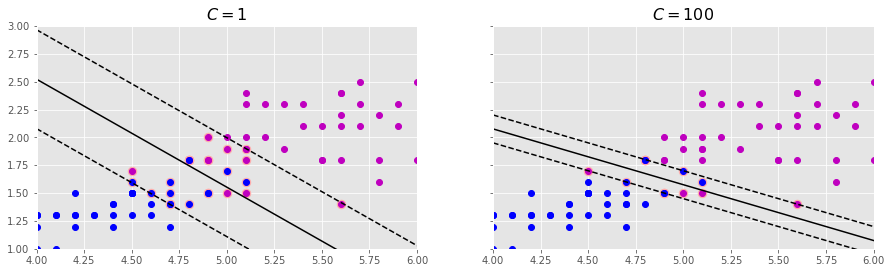

In [120]:
mpl.rc("axes",labelsize=14)
fig,axes = pl.subplots(ncols=2,figsize=(15,4.1),sharey=True)
pl.style.use("ggplot")

pl.sca(axes[0])
# Plot points with class 1
pl.plot(X[:,0][Y==1],X[:,1][Y==1],"om")
# Plot points with class 0
pl.plot(X[:,0][Y==0],X[:,1][Y==0],"ob")
# Draw the first SVM decision boundary
svc_decision_boundary(clf1,4,6)
pl.title("$C = {}$".format(clf1.C),fontsize=16)
pl.axis([4,6,1,3])

pl.sca(axes[1])
# Plot points with class 1
pl.plot(X[:,0][Y==1],X[:,1][Y==1],"om")
# Plot points with class 0
pl.plot(X[:,0][Y==0],X[:,1][Y==0],"ob")
# Draw the first SVM decision boundary
svc_decision_boundary(clf2,4,6)
pl.title("$C = {}$".format(clf2.C),fontsize=16)
pl.axis([4,6,1,3])

#### h) Experimental summary
Compare the effect of different $C$ values:<br />
* When the left $C$ takes a small value, that is, the training is not so strict, so the interval is much larger, and at the same time, many instances will appear in the interval (to prevent overfitting).<br />
* When the right $C$ gets a larger value, the classification of the classifier is relatively more accurate, but it also gets a smaller interval.<br />
* Of course, the value of $C$ is a parameter in the classification problem, which can be selected in other ways, and the specific problem can be assigned a specific value.

### 3.Nonlinear Support Vector Machines
#### a) Import the library and load the data

In [2]:
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as pl
from sklearn import svm  
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,noise=0.15,random_state=42) # Self-built crescent data set

#### b) Data plot

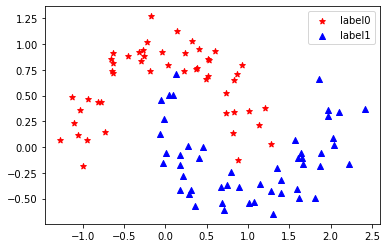

In [3]:
def plot():
    pl.scatter(X[y==0,0],X[y==0,1],c='r',marker='*',label='label0')
    pl.scatter(X[y==1,0],X[y==1,1],c='b',marker='^',label='label1')
    pl.legend()
plot()
pl.show()

#### c) Model training

In [4]:
clf = svm.SVC(kernel='rbf',C=10)
clf.fit(X,y)

SVC(C=10)

<class 'numpy.ndarray'>


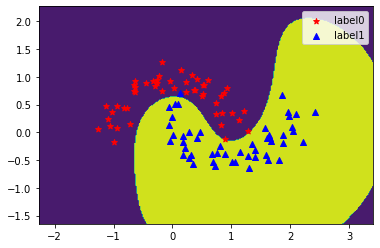

In [5]:
# Get the range where the data is located
x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1

# Use meshgrid to get grid matrix
#arange(start, end, step), similar to range(), but also without the end value. but returns an array object
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
x_new = np.c_[xx.ravel(),yy.ravel()] # reval flattens the data and converts multi-dimensional data into 1-dimensional
print(type(x_new))
z = clf.predict(x_new)
z = z.reshape(xx.shape)# transform array
# draw a contour map
cs = pl.contourf(xx,yy,z)# z stands for height, and the displayed color is different for different heights
plot()
pl.show()

#### d) Self-built test set to verify its accuracy

In [6]:
X,y = make_moons(n_samples=10000,noise=0.15,random_state=42)
clf.predict(X)
print("Accuracy：",clf.score(X, y))

Accuracy： 0.991


The correct rate of the training set has reached more than 0.99, which has reached a high level.
## Part 3 Task
1. Briefly talk about the main idea of SVM?
2. Use the make_circles() method in Sklearn to generate circular-like training datasets, draw data and decision boundary graphics, and build a test set to verify the accuracy. Hint:<br>

+ function : 
>X_circle,Y_circle=make_circles(n_samples=400,noise=0.1,factor=0.1)<br>
+ parameter : 
> n_samples：Set the sample size; <br>
noise: Set the noise, if it is small, it will be more concentrated; <br>
factor：0 < double < 1 defaults 0.8, scale factor between inner and outer circles; <br>
random_state: Set random parameters (section).
